In [2]:
from igears import PertData, iGEARS

In [3]:
pert_data = PertData('./gears_data')
pert_data.load(data_name = 'norman')
pert_data.prepare_split(split = 'simulation', seed = 1)
pert_data.get_dataloader(batch_size = 64, test_batch_size = 128)

Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:43
combo_seen2:19
unseen_single:36
Done!
Creating dataloaders....
Done!


here1


In [4]:
pert_data.adata.var.head()

,gene_name
gene_id,
ENSG00000239945,RP11-34P13.8
ENSG00000223764,RP11-54O7.3
ENSG00000187634,SAMD11
ENSG00000187642,PERM1
ENSG00000188290,HES4


In [5]:
pert_data.adata.obs.head()

,condition,cell_type,dose_val,control,condition_name
cell_barcode,,,,,
AAACCTGAGGCATGTG-1,TSC22D1+ctrl,A549,1+1,0,A549_TSC22D1+ctrl_1+1
AAACCTGAGGCCCTTG-1,KLF1+MAP2K6,A549,1+1,0,A549_KLF1+MAP2K6_1+1
AAACCTGCACGAAGCA-1,ctrl,A549,1,1,A549_ctrl_1
AAACCTGCAGACGTAG-1,CEBPE+RUNX1T1,A549,1+1,0,A549_CEBPE+RUNX1T1_1+1
AAACCTGCAGCCTTGG-1,MAML2+ctrl,A549,1+1,0,A549_MAML2+ctrl_1+1


In [6]:
pert_data.adata.obs.condition.value_counts()

ctrl             7353
CEBPE+RUNX1T1    1030
KLF1+ctrl         997
TBX3+TBX2         969
SLC4A1+ctrl       853
                 ... 
PLK4+STIL          66
SAMD1+TGFBR2       59
JUN+CEBPB          52
CBL+UBASH3A        50
C3orf72+FOXL2      49
Name: condition, Length: 277, dtype: int64

In [7]:
pert_data.adata.X.shape

(89357, 5045)

In [8]:
# set up and train a model
gears_model = iGEARS(pert_data, device = 'cuda:1')
gears_model.model_initialize(hidden_size = 64)
gears_model.train(epochs = 20)

Found local copy...
Start Training...
Epoch 1 Step 1 Train Loss: 0.4924
Epoch 1 Step 51 Train Loss: 0.4393
Epoch 1 Step 101 Train Loss: 0.4843
Epoch 1 Step 151 Train Loss: 0.5940
Epoch 1 Step 201 Train Loss: 0.4728
Epoch 1 Step 251 Train Loss: 0.4688
Epoch 1 Step 301 Train Loss: 0.4713
Epoch 1 Step 351 Train Loss: 0.4911
Epoch 1 Step 401 Train Loss: 0.5015
Epoch 1 Step 451 Train Loss: 0.5078
Epoch 1 Step 501 Train Loss: 0.4749
Epoch 1 Step 551 Train Loss: 0.5650
Epoch 1 Step 601 Train Loss: 0.4648
Epoch 1 Step 651 Train Loss: 0.4598
Epoch 1 Step 701 Train Loss: 0.4636
Epoch 1 Step 751 Train Loss: 0.4329
Epoch 1: Train Overall MSE: 0.0110 Validation Overall MSE: 0.0105. 
Train Top 20 DE MSE: 0.1169 Validation Top 20 DE MSE: 0.2789. 
Epoch 2 Step 1 Train Loss: 0.4547
Epoch 2 Step 51 Train Loss: 0.5136
Epoch 2 Step 101 Train Loss: 0.4707
Epoch 2 Step 151 Train Loss: 0.4523
Epoch 2 Step 201 Train Loss: 0.4718
Epoch 2 Step 251 Train Loss: 0.4584
Epoch 2 Step 301 Train Loss: 0.4808
Epoch 2 S

Epoch 12 Step 551 Train Loss: 0.4706
Epoch 12 Step 601 Train Loss: 0.5128
Epoch 12 Step 651 Train Loss: 0.5635
Epoch 12 Step 701 Train Loss: 0.4850
Epoch 12 Step 751 Train Loss: 0.4885
Epoch 12: Train Overall MSE: 0.0023 Validation Overall MSE: 0.0035. 
Train Top 20 DE MSE: 0.0519 Validation Top 20 DE MSE: 0.2185. 
Epoch 13 Step 1 Train Loss: 0.4803
Epoch 13 Step 51 Train Loss: 0.5098
Epoch 13 Step 101 Train Loss: 0.4695
Epoch 13 Step 151 Train Loss: 0.4859
Epoch 13 Step 201 Train Loss: 0.4792
Epoch 13 Step 251 Train Loss: 0.4568
Epoch 13 Step 301 Train Loss: 0.5061
Epoch 13 Step 351 Train Loss: 0.4862
Epoch 13 Step 401 Train Loss: 0.4905
Epoch 13 Step 451 Train Loss: 0.5402
Epoch 13 Step 501 Train Loss: 0.5682
Epoch 13 Step 551 Train Loss: 0.4915
Epoch 13 Step 601 Train Loss: 0.4944
Epoch 13 Step 651 Train Loss: 0.4958
Epoch 13 Step 701 Train Loss: 0.5122
Epoch 13 Step 751 Train Loss: 0.5062
Epoch 13: Train Overall MSE: 0.0023 Validation Overall MSE: 0.0036. 
Train Top 20 DE MSE: 0.04

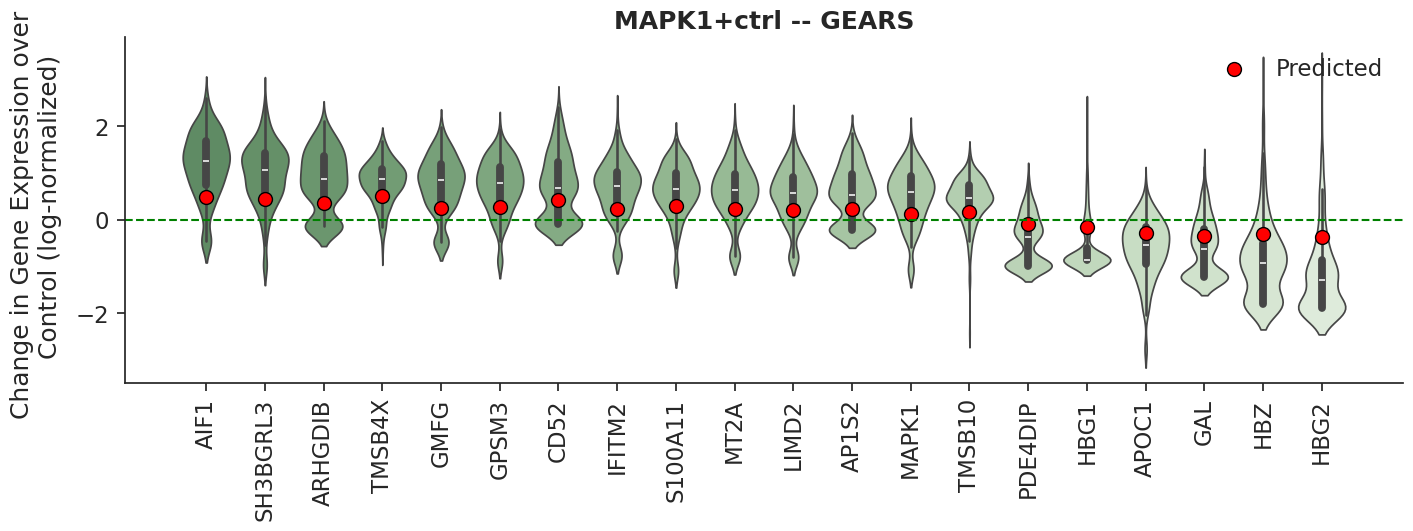

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm 
query = "MAPK1+ctrl"
try:
    adata = gears_model.adata
    gene2idx = gears_model.node_map
    cond2name = dict(adata.obs[['condition', 'condition_name']].values)
    gene_raw2id = dict(zip(adata.var.index.values, adata.var.gene_name.values))

    de_idx = [gene2idx[gene_raw2id[i]] for i in
            adata.uns['top_non_dropout_de_20'][cond2name[query]]]
    genes = [gene_raw2id[i] for i in
                adata.uns['top_non_dropout_de_20'][cond2name[query]]]
    truth = adata[adata.obs.condition == query].X.toarray()[:, de_idx]

    query_ = [q for q in query.split('+') if q != 'ctrl']
    pred = gears_model.predict([query_])['_'.join(query_)][de_idx]
    ctrl_means = adata[adata.obs['condition'] == 'ctrl'].to_df().mean()[
        de_idx].values

    pred = pred - ctrl_means
    truth = truth - ctrl_means

    # Calculate mean values for each gene and sort genes by mean value (descending order)
    mean_values = np.mean(truth, axis=0)
    sorted_indices = np.argsort(mean_values)[::-1]  # Reverse order for descending
    sorted_genes = np.array(genes)[sorted_indices]
    sorted_truth = truth[:, sorted_indices]

    # Sort 'pred' using the same indices as 'truth' and 'genes'
    sorted_pred = pred[sorted_indices]

    # Create a DataFrame for seaborn
    df = pd.DataFrame(sorted_truth, columns=sorted_genes)

    # Custom color palette from darker to lighter, with a lighter dark shade
    n_genes = len(sorted_genes)
    #palette = sns.cubehelix_palette(n_genes, dark = 0.3, rot=-.1, light=0.9, reverse=True)  # Lighter dark shade

    palette = sns.cubehelix_palette(n_genes+15, start = 2.1, rot=-.1, light=0.9, reverse=True)[15:]
    # Change the color of the first violin plot to pink
    #palette[0] = 'pink'

    plt.figure(figsize=[16.5, 4.5])
    plt.title(str(query)+" -- GEARS", fontweight='bold')

    # Create violin plot with sorted data and modified palette
    sns.violinplot(data=df, inner="box", palette=palette)

    # Add 'pred' as dots on the violin plot with a label for the legend
    x_coords = np.arange(len(sorted_genes))
    plt.scatter(x_coords, sorted_pred, color='red', edgecolor='black', zorder=2, label='Predicted',s=100)

    # Add legend to the plot with no background color
    plt.legend(frameon=False)

    plt.axhline(0, linestyle="dashed", color='green')

    ax = plt.gca()
    ax.xaxis.set_ticklabels(sorted_genes, rotation=90)

    plt.ylabel("Change in Gene Expression over \n Control (log-normalized)", labelpad=10)
    plt.tick_params(axis='x', which='major', pad=5)
    plt.tick_params(axis='y', which='major', pad=5)
    sns.despine()
    plt.savefig("gears_pert_violin_plot/"+str(query)+"_perturbation.pdf", format='pdf', bbox_inches='tight')
    #plt.show()
except:
    print(query)
    pass